In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
cc = pd.read_csv('cc.csv')
cc.head()

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48
0,Blake Griffin,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171
1,Terrence Williams,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004
2,Gerald Henderson,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063
3,Tyler Hansbrough,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134
4,Earl Clark,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038


In [3]:
cc48 = cc.loc[:, 'PPG':'BPG'].apply(lambda x: 48 * (x / cc.MPG))
cc48.columns=['PP48', 'RP48', 'AP48', 'SP48', 'BP48']
cc = pd.concat([cc, cc48], axis = 1, sort = True)
cc.head()

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint,Rk,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48
0,Blake Griffin,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28,19,2009,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171,30.034286,12.342857,6.171429,1.234286,0.685714
1,Terrence Williams,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18,464,2009,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004,17.842932,9.047120,6.031414,1.256545,0.251309
2,Gerald Henderson,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14,258,2009,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063,20.756757,5.930502,3.521236,1.297297,0.555985
3,Tyler Hansbrough,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27,58,2009,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134,19.029586,11.928994,1.136095,1.420118,0.568047
4,Earl Clark,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35,329,2009,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038,15.194245,10.359712,1.726619,1.035971,1.726619


In [4]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 44 columns):
Player                      348 non-null object
Pk                          348 non-null float64
Height (No Shoes)           348 non-null float64
Height (With Shoes)         348 non-null float64
Wingspan                    348 non-null float64
Standing reach              348 non-null float64
Vertical (Max)              300 non-null float64
Vertical (Max Reach)        300 non-null float64
Vertical (No Step)          301 non-null float64
Vertical (No Step Reach)    301 non-null float64
Weight                      347 non-null float64
Body Fat                    347 non-null float64
Hand (Length)               311 non-null float64
Hand (Width)                309 non-null float64
Bench                       195 non-null float64
Agility                     295 non-null float64
Sprint                      298 non-null float64
Rk                          348 non-null int64
Year            

### Imputation

In [5]:
cc_imp = cc.copy()
# Kris Dunn is the only player who doesn't have weight/body fat measurements
cc[cc.Weight.isnull()]
# We'll go ahead and impute the median weight and body fat among guards, since weight/body fat seem slightly skewed
cc_imp.loc[cc.Weight.isnull(), 'Weight'] = cc[cc.Pos == 'G'].Weight.median()
cc_imp.loc[cc['Body Fat'].isnull(), ['Body Fat']] = cc[cc.Pos == 'G']['Body Fat'].median()

In [6]:
cc[['Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)', 'Vertical (No Step Reach)']].corr()

,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach)
Vertical (Max),1.000000,0.194278,0.830770,-0.032666
Vertical (Max Reach),0.194278,1.000000,0.228542,0.902539
Vertical (No Step),0.830770,0.228542,1.000000,0.241105
Vertical (No Step Reach),-0.032666,0.902539,0.241105,1.000000


In [7]:
# now let's impute the verticals. since we're missing more values here, let's do a linear regression
physicals = ['Height (With Shoes)', 'Wingspan', 'Standing reach', 'Weight', 'Body Fat']
cc[physicals + ['Vertical (Max)', 'Vertical (Max Reach)']].corr()
# we'll pick Standing Reach and Body Fat, since they're the best predictors that aren't highly correlated

,Height (With Shoes),Wingspan,Standing reach,Weight,Body Fat,Vertical (Max),Vertical (Max Reach)
Height (With Shoes),1.000000,0.839848,0.922222,0.748205,0.297190,-0.468506,0.686231
Wingspan,0.839848,1.000000,0.904693,0.731916,0.282696,-0.406793,0.716102
Standing reach,0.922222,0.904693,1.000000,0.721674,0.330603,-0.560923,0.703120
Weight,0.748205,0.731916,0.721674,1.000000,0.550173,-0.377891,0.532961
Body Fat,0.297190,0.282696,0.330603,0.550173,1.000000,-0.393570,0.011184
Vertical (Max),-0.468506,-0.406793,-0.560923,-0.377891,-0.393570,1.000000,0.194278
Vertical (Max Reach),0.686231,0.716102,0.703120,0.532961,0.011184,0.194278,1.000000


In [8]:
from sklearn import linear_model
def impute_linear(impute, regress):
    if type(regress) is not list:
        regress = [regress]
    if type(impute) is not list:
        impute = [impute]
    for colname in impute:
        full = cc_imp[regress + [colname]]
        train = full.dropna()
        test = full[full[colname].isnull()]
        imp = linear_model.LinearRegression()
        imp.fit(X = train.drop(colname, axis = 1), y = train[colname])
        # print(imp.score(X = train.drop(colname, axis = 1), y = train[colname]))
        preds = imp.predict(X = test.drop(colname, axis = 1))
        # impute the linearly regression prediction
        cc_imp.loc[cc[colname].isnull(), colname] = preds

In [9]:
cc[physicals + ['Hand (Length)', 'Hand (Width)']].corr()

,Height (With Shoes),Wingspan,Standing reach,Weight,Body Fat,Hand (Length),Hand (Width)
Height (With Shoes),1.000000,0.839848,0.922222,0.748205,0.297190,0.610892,0.408074
Wingspan,0.839848,1.000000,0.904693,0.731916,0.282696,0.732400,0.432590
Standing reach,0.922222,0.904693,1.000000,0.721674,0.330603,0.634000,0.394149
Weight,0.748205,0.731916,0.721674,1.000000,0.550173,0.648101,0.450377
Body Fat,0.297190,0.282696,0.330603,0.550173,1.000000,0.272930,0.062573
Hand (Length),0.610892,0.732400,0.634000,0.648101,0.272930,1.000000,0.530721
Hand (Width),0.408074,0.432590,0.394149,0.450377,0.062573,0.530721,1.000000


In [10]:
cc[physicals + ['Agility', 'Sprint']].corr()

,Height (With Shoes),Wingspan,Standing reach,Weight,Body Fat,Agility,Sprint
Height (With Shoes),1.000000,0.839848,0.922222,0.748205,0.297190,0.415395,0.493086
Wingspan,0.839848,1.000000,0.904693,0.731916,0.282696,0.438564,0.454375
Standing reach,0.922222,0.904693,1.000000,0.721674,0.330603,0.452596,0.490292
Weight,0.748205,0.731916,0.721674,1.000000,0.550173,0.387777,0.426784
Body Fat,0.297190,0.282696,0.330603,0.550173,1.000000,0.166246,0.347195
Agility,0.415395,0.438564,0.452596,0.387777,0.166246,1.000000,0.470427
Sprint,0.493086,0.454375,0.490292,0.426784,0.347195,0.470427,1.000000


In [11]:
impute_linear(['Vertical (Max)', 'Vertical (No Step)'], ['Standing reach', 'Body Fat'])
impute_linear(['Vertical (Max Reach)', 'Vertical (No Step Reach)'], 'Wingspan')
impute_linear('Hand (Length)', 'Wingspan')
impute_linear('Hand (Width)', 'Weight')
impute_linear(['Agility', 'Sprint'], 'Standing reach')

In [12]:
cc_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 44 columns):
Player                      348 non-null object
Pk                          348 non-null float64
Height (No Shoes)           348 non-null float64
Height (With Shoes)         348 non-null float64
Wingspan                    348 non-null float64
Standing reach              348 non-null float64
Vertical (Max)              348 non-null float64
Vertical (Max Reach)        348 non-null float64
Vertical (No Step)          348 non-null float64
Vertical (No Step Reach)    348 non-null float64
Weight                      348 non-null float64
Body Fat                    348 non-null float64
Hand (Length)               348 non-null float64
Hand (Width)                348 non-null float64
Bench                       195 non-null float64
Agility                     348 non-null float64
Sprint                      348 non-null float64
Rk                          348 non-null int64
Year            

### Using scikit-learn

In [13]:
cc_sk = cc_imp.copy().drop(['Bench', 'Rk'], axis = 1)[(cc_imp.G > 40) & (cc_imp.MPG > 5)].fillna(0)
cc_sk.head()

,Player,Pk,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Agility,Sprint,Year,Tm,Age,Pos,Born,College,From,To,G,MPG,PPG,RPG,APG,SPG,BPG,FG%,2P%,3P%,FT%,WS,WS/48,PP48,RP48,AP48,SP48,BP48
0,Blake Griffin,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,8.797370,9.796599,10.95,3.28,2009,LAC,20.106,F,us,Oklahoma,2011.0,2019.0,604.0,35.0,21.9,9.0,4.5,0.9,0.5,0.502,0.522,0.342,0.692,75.3,0.171,30.034286,12.342857,6.171429,1.234286,0.685714
1,Terrence Williams,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,8.600007,9.340248,11.15,3.18,2009,NJN,22.003,F,us,Louisville,2010.0,2013.0,153.0,19.1,7.1,3.6,2.4,0.5,0.1,0.412,0.432,0.317,0.659,-0.2,-0.004,17.842932,9.047120,6.031414,1.256545,0.251309
2,Gerald Henderson,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,8.709653,9.366325,11.17,3.14,2009,CHA,21.204,G,us,Duke,2010.0,2017.0,535.0,25.9,11.2,3.2,1.9,0.7,0.3,0.440,0.460,0.327,0.793,18.3,0.063,20.756757,5.930502,3.521236,1.297297,0.555985
3,Tyler Hansbrough,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,8.819299,9.614059,11.12,3.27,2009,IND,23.240,F,us,UNC,2010.0,2016.0,428.0,16.9,6.7,4.2,0.4,0.5,0.2,0.439,0.442,0.136,0.738,20.2,0.134,19.029586,11.928994,1.136095,1.420118,0.568047
4,Earl Clark,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,9.082449,9.535827,11.17,3.35,2009,PHO,21.165,F,us,Louisville,2010.0,2015.0,261.0,13.9,4.4,3.0,0.5,0.3,0.5,0.403,0.424,0.328,0.664,2.9,0.038,15.194245,10.359712,1.726619,1.035971,1.726619


In [14]:
combine_sk = cc_sk.loc[:, 'Height (No Shoes)':'Sprint'].assign(Age = cc_sk.Age)
career_sk = cc_sk.loc[:, 'G':]

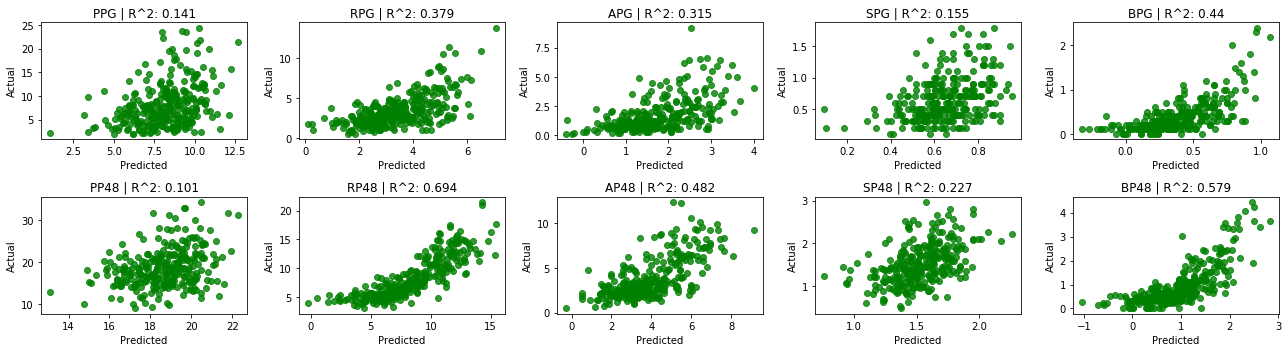

In [15]:
fig = plt.figure(figsize = (18, 5))   
for i, colname in enumerate(['PPG', 'RPG', 'APG', 'SPG', 'BPG', 'PP48', 'RP48', 'AP48', 'SP48', 'BP48']):
    plt.subplot(2, 5, i + 1)
    var = career_sk[colname]
    per48 = linear_model.LinearRegression()
    per48.fit(X = combine_sk, y = var)
    score = np.round(per48.score(X = combine_sk, y = var), 3)
    # print(metrics.mean_absolute_error(var, per48.predict(combine_sk)))
    plt.plot(per48.predict(combine_sk), var, 'o', c = 'green', alpha = 0.8)
    plt.title('{} | R^2: {}'.format(colname, score))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()

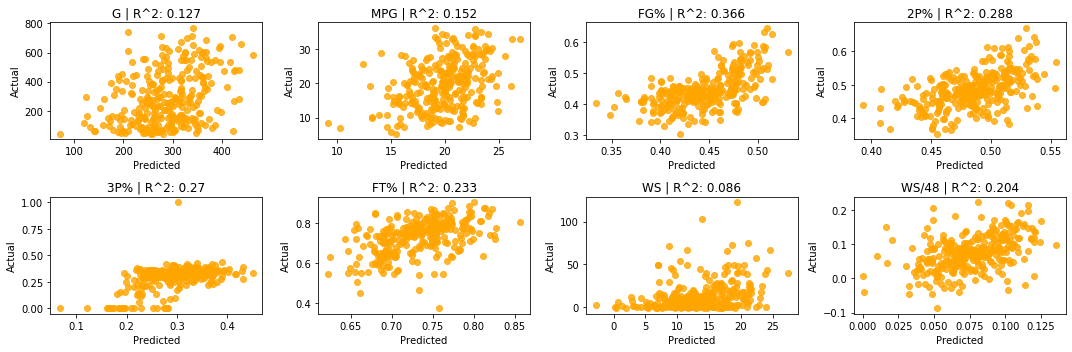

In [16]:
fig = plt.figure(figsize = (15, 5))   
for i, colname in enumerate(['G', 'MPG', 'FG%', '2P%', '3P%', 'FT%', 'WS', 'WS/48']):
    plt.subplot(2, 4, i + 1)
    var = career_sk[colname]
    per48 = linear_model.LinearRegression()
    per48.fit(X = combine_sk, y = var)
    score = np.round(per48.score(X = combine_sk, y = var), 3)
    # print(metrics.mean_absolute_error(var, per48.predict(combine_sk)))
    plt.plot(per48.predict(combine_sk), var, 'o', c = 'orange', alpha = 0.8)
    plt.title('{} | R^2: {}'.format(colname, score))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()

Let's try doing predictions with training and testing. We'll examine 4 different statistics and fit 4 different models to each.

In [17]:
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict, train_test_split, cross_validate
from sklearn import tree, metrics, linear_model, ensemble

In [18]:
# let's do RP48, AP48, BP48, and WS/48
target = career_sk['PP48']
X_train, X_test, y_train, y_test = train_test_split(combine_sk, target, test_size = 0.25)
mdl_obj = tree.DecisionTreeRegressor()
# mdl_obj = linear_model.LinearRegression()
mdl = mdl_obj.fit(X_train, y_train)
predictions = mdl.predict(X_test)
print(metrics.mean_absolute_error(predictions, y_test))

4.55513505601904


In [32]:
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error']
models = ['Linear Regression', 'Lasso', 'Decision Tree', 'Random Forest']

def run_model(model, response):
    if model == 'Linear Regression':
        mdl_obj = linear_model.LinearRegression()
    elif model == 'Lasso':
        mdl_obj = linear_model.Lasso(alpha = 0.1)
    elif model == 'Decision Tree':
        mdl_obj = tree.DecisionTreeRegressor()
    elif model == 'Random Forest':
        mdl_obj = ensemble.RandomForestRegressor(n_estimators = 50)
    mdl = mdl_obj.fit(combine_sk, career_sk[response])
    cv_res = pd.DataFrame(cross_validate(mdl, combine_sk, career_sk[response], cv = 5, scoring = scoring))
    return(cv_res.assign(model = model))

def mult_scorer(response, scoring = scoring, models = models):
    # X_train, X_test, y_train, y_test = train_test_split(combine_sk, career_sk[response], test_size = 0.25)
    for i, model in enumerate(models):
        if i == 0:
            mult_res = run_model(model, response)
        else:
            mult_res = pd.concat([mult_res, run_model(model, response)], sort = 'False')                         
    return(mult_res)

In [33]:
mult_scorer('RP48').groupby('model').mean()

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
model,,,,
Decision Tree,0.004188,0.002400,-1.767035,-5.689148
Lasso,0.003590,0.002592,-1.648677,-4.348813
Linear Regression,0.010374,0.007580,-1.678557,-4.467212
Random Forest,0.071822,0.006182,-1.376079,-3.479059


In [34]:
mult_scorer('AP48', scoring = scoring).groupby('model').mean()

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
model,,,,
Decision Tree,0.005579,0.002599,-1.683520,-5.080114
Lasso,0.003391,0.002593,-1.340729,-3.033608
Linear Regression,0.002594,0.002792,-1.342484,-3.115831
Random Forest,0.074399,0.006186,-1.272563,-2.893628


In [35]:
mult_scorer('BP48', scoring = scoring).groupby('model').mean()

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
model,,,,
Decision Tree,0.004196,0.002019,-0.533029,-0.558438
Lasso,0.002793,0.001795,-0.442478,-0.366737
Linear Regression,0.006182,0.004985,-0.450485,-0.362321
Random Forest,0.075990,0.006383,-0.364621,-0.291575


In [36]:
mult_scorer('WS/48', scoring = scoring).groupby('model').mean()

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_mean_squared_error
model,,,,
Decision Tree,0.004588,0.001994,-0.054952,-0.004834
Lasso,0.002387,0.002592,-0.039015,-0.002566
Linear Regression,0.006979,0.005387,-0.038594,-0.002531
Random Forest,0.077194,0.006396,-0.039898,-0.002639


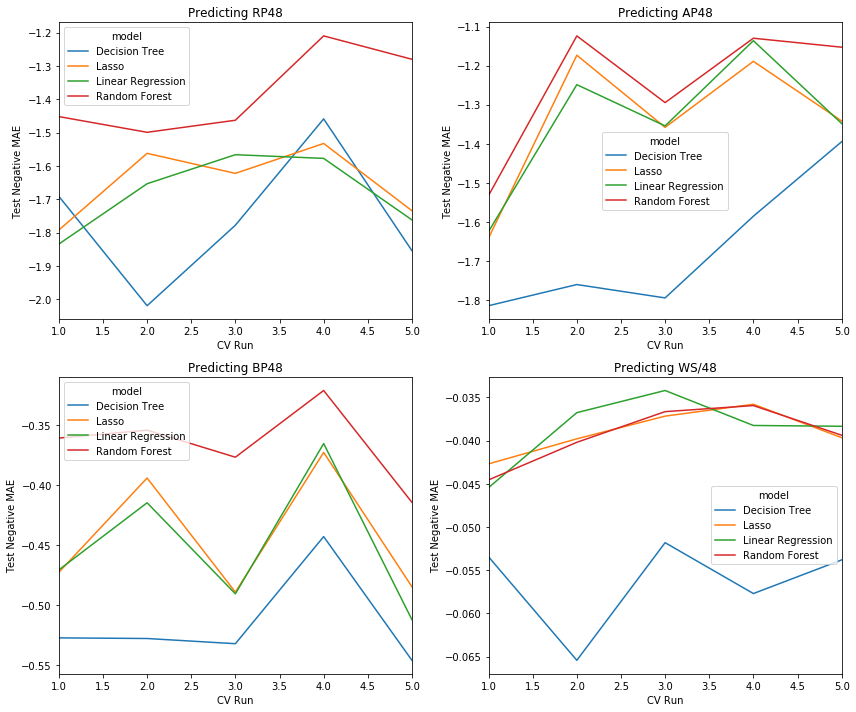

In [37]:
fig = plt.figure(figsize = (12, 10))   
for i, colname in enumerate(['RP48', 'AP48', 'BP48', 'WS/48']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_ylabel('Test Negative MAE')
    df = mult_scorer(colname, scoring = scoring).pivot(columns = 'model', values = 'test_neg_mean_absolute_error')
    df.index = np.arange(1, len(df) + 1)
    df.index.name = 'CV Run'
    df.plot(title = 'Predicting {}'.format(colname), ax = ax)
    #plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()

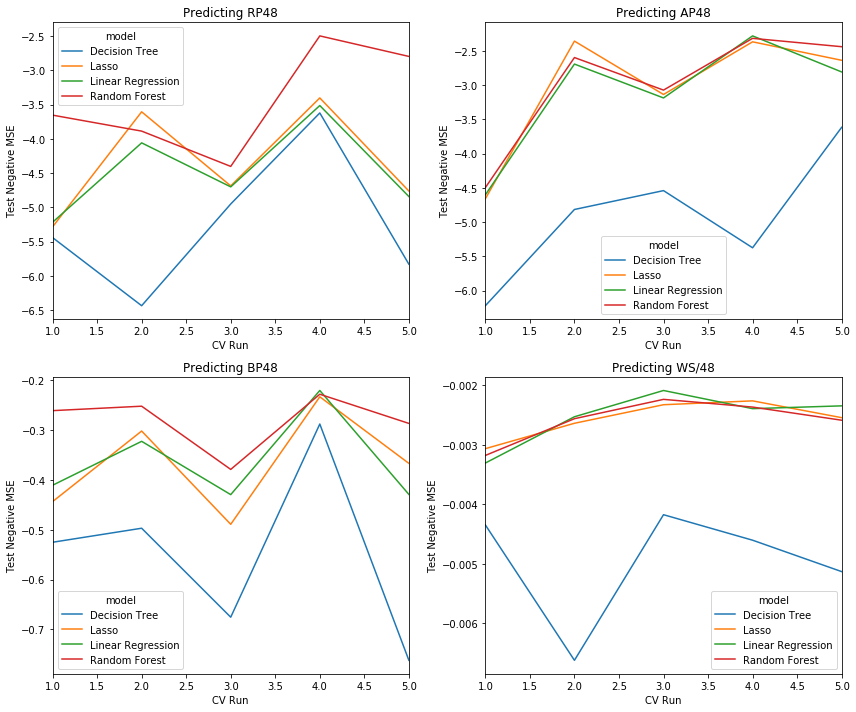

In [38]:
fig = plt.figure(figsize = (12, 10))   
for i, colname in enumerate(['RP48', 'AP48', 'BP48', 'WS/48']):
    ax = fig.add_subplot(2, 2, i + 1)
    ax.set_ylabel('Test Negative MSE')
    df = mult_scorer(colname, scoring = scoring).pivot(columns = 'model', values = 'test_neg_mean_squared_error')
    df.index = np.arange(1, len(df) + 1)
    df.index.name = 'CV Run'
    df.plot(title = 'Predicting {}'.format(colname), ax = ax)
    #plt.subplots_adjust(hspace = 0.5)
plt.tight_layout()
plt.show()